# Gradient Descent

In [57]:
# import statement for autograd wrapped numpy
import autograd.numpy as np   
# import statement for gradient calculator
from autograd import grad  
import math
import matplotlib.pyplot as plt

We can use the following generic code for doing the gradient descent: (Found in Machine Learning Refined Textbook)

In [58]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return cost_history, np.array(weight_history)

For this example I want to find the minimum of 
$$g(w)=\frac{1}{50}(w^4+w^2+10w)$$ using the above gradient descent. I will test different step lengths; $\alpha$=1, 0.1 and 0.01 starting from $w^0=2$. Plot the resulting cost histories, and determine which step length is the best for this problem.

In [59]:
#Initialize variables
g = lambda w: (1/50)*(pow(w,4)+pow(w,2)+10*w)
alpha_choice1= 1
alpha_choice2= 0.1
alpha_choice3= 0.01
w=np.array([2])
max_its=20

In [60]:
cost_history1, weight_history1 = gradient_descent(g, alpha_choice1, max_its, w)
cost_history2, weight_history2 = gradient_descent(g, alpha_choice2, max_its, w)
cost_history3, weight_history3 = gradient_descent(g, alpha_choice3, max_its, w)
t = np.arange(max_its+1)

I plot the cost histories to determine which step length works the best for this function starting at point $w^0=2$. A good indication a local minima has been found is the cost history will plateau.

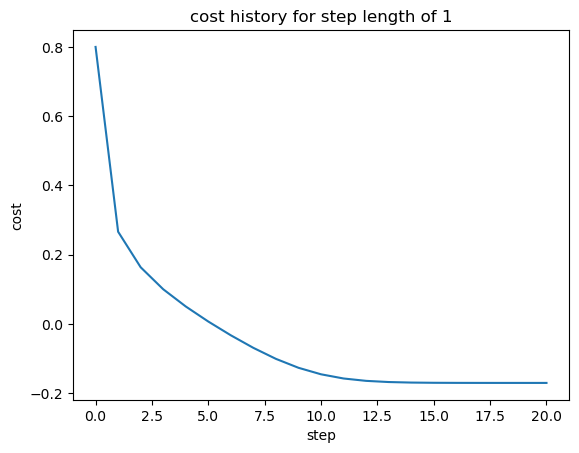

In [61]:
#plot cost history for a step length of 1
plt.plot(t, cost_history1)
plt.xlabel('step')
plt.ylabel('cost')
plt.title('cost history for step length of 1')
plt.show()

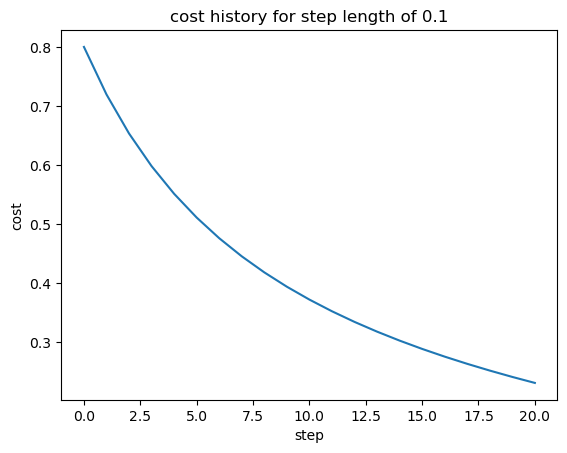

In [62]:
#plot the cost history for a step length of 0.1
plt.plot(t, cost_history2)
plt.xlabel('step')
plt.ylabel('cost')
plt.title('cost history for step length of 0.1')
plt.show()

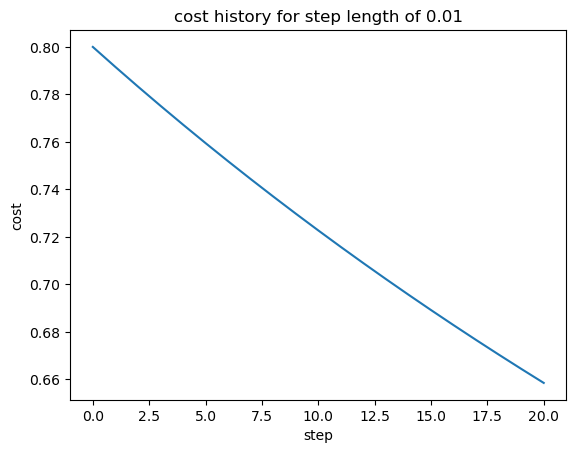

In [63]:
#plot the cost history for a step length of 0.01
plt.plot(t, cost_history3)
plt.xlabel('step')
plt.ylabel('cost')
plt.title('cost history for step length of 0.01')
plt.show()

For this particular function and initial point, step length of 1 performs the best. It reaches the minimum close to around 13 steps in a exponentially decaying trend, whereas a step length of 0.1 has a shallower curve for its descent, and consequently doesnt reach the minimum after 20 steps. Likewise for a step length of 0.01, it doesn't reach the minimum in the 20 steps, and it has a decreasing linear trend, which is more computationally expensive then the other two step length values, and proves to be undiserable. 

As another visual aid I added the weight histories for all three step lengths in comparison to the function in question below. 

[]

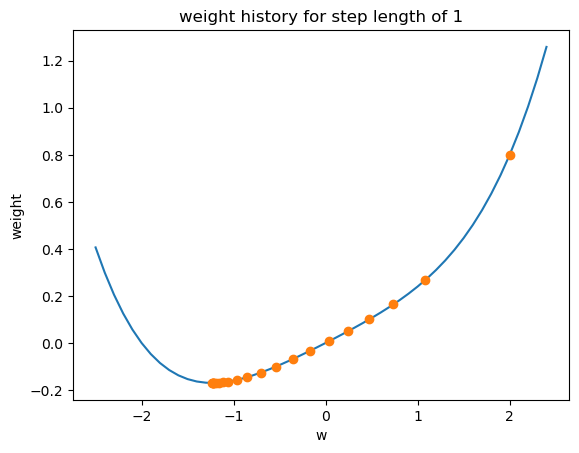

In [64]:
x = np.arange(-2.5, 2.5, 0.1)
plt.plot(x,g(x))
plt.plot(weight_history1, g(weight_history1), 'o')
plt.xlabel('w')
plt.ylabel('weight')
plt.title('weight history for step length of 1')
plt.plot()

[]

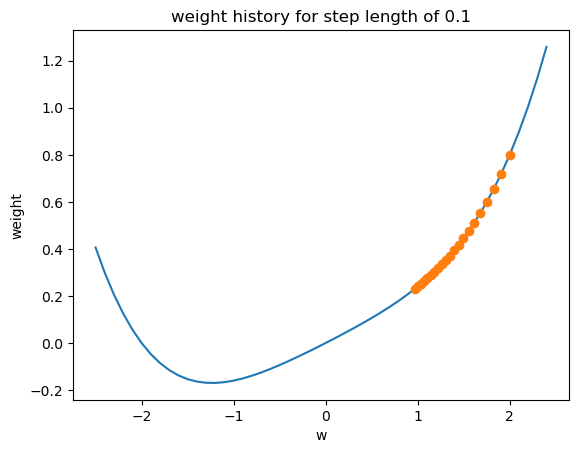

In [65]:
plt.plot(x,g(x))
plt.plot(weight_history2, g(weight_history2), 'o')  
plt.xlabel('w')
plt.ylabel('weight')
plt.title('weight history for step length of 0.1')
plt.plot()

[]

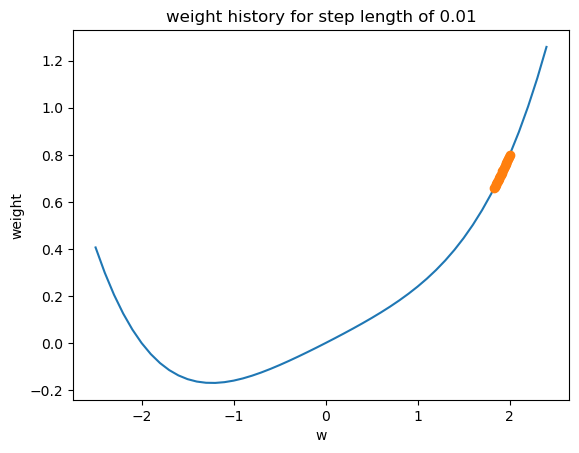

In [66]:
plt.plot(x,g(x))
plt.plot(weight_history3, g(weight_history3), 'o')
plt.xlabel('w')
plt.ylabel('weight')
plt.title('weight history for step length of 0.01')
plt.plot()

By this visualization it is clear to see the only step length that reaches the minimum of the function is for $\alpha = 1$.